In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_csv('/media/ankit/ankit/churn_prediction.csv')

In [3]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
dataset.shape

(28382, 21)

In [5]:
print(dataset.isnull().sum())

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64


In [6]:
df=dataset.replace(to_replace = np.nan,value = 0)

In [7]:
print(df.isnull().sum())
df.shape

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64


(28382, 21)

In [8]:
df.drop(['customer_id'], axis=1, inplace = True)

In [9]:
df.describe()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,2364.336446,48.208336,0.317102,773.585582,2.225530,925.975019,62.049010,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,1610.124506,17.807163,0.958386,446.655915,0.660443,937.799129,84.270033,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,6.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,24.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,83.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


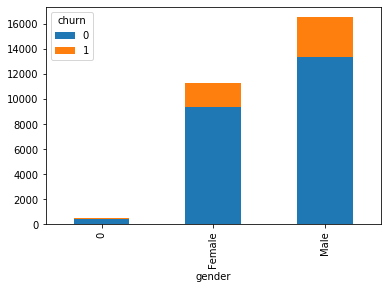

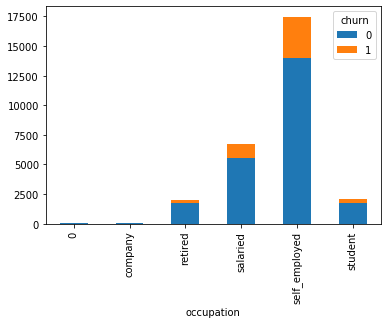

In [10]:
counts = df.groupby(['gender','churn']).churn.count().unstack()

counts.plot(kind='bar', stacked=True)

counts = df.groupby(['occupation','churn']).churn.count().unstack()

counts.plot(kind='bar', stacked=True)

In [12]:
gender = pd.get_dummies(df.gender).iloc[:,1:]
print(counts)

churn              0     1
occupation                
0                 67    13
company           36     4
retired         1719   305
salaried        5557  1147
self_employed  14009  3467
student         1734   324


In [13]:
tempdata = df.drop(['occupation','gender'], axis=1)

In [14]:
occupation = pd.get_dummies(df.occupation).iloc[:,1:]

gender = pd.get_dummies(df.gender).iloc[:,1:]

In [15]:
df = pd.concat([tempdata,occupation,gender], axis=1)
df.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,...,current_month_balance,previous_month_balance,churn,company,retired,salaried,self_employed,student,Female,Male
0,3135,66,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,...,1458.71,1458.71,0,0,0,0,1,0,0,1
1,310,35,0.0,0.0,2,3214,60.0,5390.37,8704.66,7799.26,...,6496.78,8787.61,0,0,0,0,1,0,0,1
2,2356,31,0.0,146.0,2,41,0.0,3913.16,5815.29,4910.17,...,5006.28,5070.14,0,0,0,1,0,0,0,1
3,478,90,0.0,1020.0,2,582,147.0,2291.91,2291.91,2084.54,...,2291.91,1669.79,1,0,0,0,1,0,0,0
4,2531,42,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,...,1157.15,1677.16,1,0,0,0,1,0,0,1


In [16]:
dataset_features = df.drop(['churn'], axis=1)

dataset_labels = df['churn']

In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.2, random_state=21)

In [18]:
from sklearn.ensemble import RandomForestClassifier as rfc

rfc_object = rfc(n_estimators=200, random_state=0)

rfc_object.fit(train_features, train_labels)

predicted_labels = rfc_object.predict(test_features)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(test_labels, predicted_labels))

print(confusion_matrix(test_labels, predicted_labels))

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4622
           1       0.72      0.45      0.56      1055

    accuracy                           0.87      5677
   macro avg       0.80      0.71      0.74      5677
weighted avg       0.85      0.87      0.85      5677

[[4436  186]
 [ 577  478]]
0.8655980271270037


In [20]:
from sklearn.linear_model import LogisticRegression

lr_object = LogisticRegression()

lr_object.fit(train_features, train_labels)

predicted_labels = lr_object.predict(test_features)

/home/ankit/miniconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
print(classification_report(test_labels, predicted_labels))

print(confusion_matrix(test_labels, predicted_labels))

print(accuracy_score(test_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      4622
           1       0.74      0.11      0.19      1055

    accuracy                           0.83      5677
   macro avg       0.79      0.55      0.55      5677
weighted avg       0.81      0.83      0.77      5677

[[4581   41]
 [ 937  118]]
0.8277259115730139
